### Analyzing the Stroop Effect

(1) What is the independent variable? What is the dependent variable?

**Independent variable**: The test trials -- either congruent (words correspond with colors) or incongruent (words do not correspond with colors)

**Dependent variable**: The time it takes to perform the test

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**H$_{0}$**: μ1 = μ2

**H$_{1}$**: μ1 ≠ μ2

The *null hypothesis* states that the mean response time of the population for the congruent test is equal to the mean response time of the population for the incongruent test.

The *alternative hypothesis* states that the mean response times of the population for the congruent test and incongruent test are not equal.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv('stroopdata.csv')

df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [13]:
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [14]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


The incongruent test has a mean and median that is higher than the congruent test. The incongruent test also has a higher standard deviation.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc2c40add8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbc2c3c0dd8>]], dtype=object)

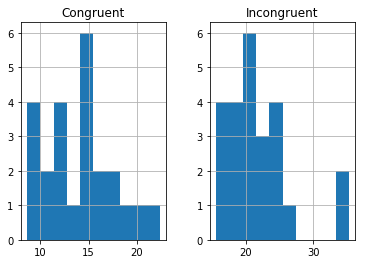

In [15]:
df.hist()

The congruent test seems a bit more normalized while the incongruent test appears to skew slightly to the right. Although the spread is larger in the incongruent test, the interquartile range is quite similar in both tests.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [16]:
from scipy.stats import ttest_rel
a = df['Congruent']
b = df['Incongruent']
N = df.count()
t_stat = (a.mean() - b.mean()) / (np.std(a - b)/np.sqrt(N))
ttest_rel(a,b)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

This test has a confidence level of 95%. A dependent t-test for paired samples is used because we are changing the independent variable to measure the same dependent variable (The reaction time of each participant was measured for two test conditions). The means of two related groups are being compared (Congruent and Incongruent). We are also using a small sample size (24). We can assume that the distribution is normal because the differences in tests are consistent throughout the sample quartiles.  We use a two tailed test because we want to meaure the change in the means in both directions.

The paired T-test yields a T-statistic of -8.02 and a p-value that is less than 0.05.

A high t-statistic and a p-value significantly less than 0.05 indicate that we should reject the null hypothesis and accept the alternative -- that the mean reaction times of a population for the Congruent and Incongruent conditions are different.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I believe what we are observing is a strong indication that humans are visually attuned to color. The association humans make with color is much quicker than that of reading a word. This is evident in the Congruent test. Participants knew that the word and the color were the same and simply reacted based on the color. In the Incongruent test participants had to parse the color from the word before reacting -- which yielded slower reaction times. We could take this a step further by testing participants' reaction time to words that appear in the same color every time. This would measure how long it takes participants to read a word rather than how quickly they can react to color. It would be interesting to compare the reaction times of this third condition to the existing ones in this test.